## 손글씨 숫자 분류  학습

케라스 파이썬 라이브러리를 사용하여 손글씨 숫자 분류 학습
- 흑백 손글씨 숫자 이미지(28x28 픽셀)를 10개의 범주(0에서 9까지)로 분류
- MNIST 데이터셋 사용
- 1980년대에 미국 국립표준기술연구소에서 수집한 
    - 6만 개의 훈련 이미지와 1만 개의 테스트 이미지로 구성
- MNIST 데이터셋은 넘파이 배열 형태로 케라스에 이미 포함되어 있음


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

#그래프 패키지 
import matplotlib.pyplot as plt 
%matplotlib inline 
# 한글 문제 해결
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')# 한글 문제 해결
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')


# 동시 출력
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [4]:
# 학습 데이터 확인
train_images.shape
#(레코드 수, x, y)
# 8비트 정수형 3D 텐서
# 28 * 28 크기의 정수 행렬 6만개가 있는 배열

(60000, 28, 28)

In [5]:
# 데이터 차원 확인
train_images.ndim # 3차원

3

In [6]:
len(train_labels)

60000

In [7]:
# 레이블은 1차원 데이터
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [8]:
#테스트 데이터 확인
test_images.shape

(10000, 28, 28)

In [9]:
# 테스트 레이블
test_labels

# dtype=uint8 : 0~255 범위로 양수만 표현이 가능 2^8개 만큼 표현 가능

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [12]:
train_labels[0]
train_images[0]

5

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

5


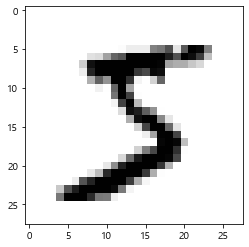

In [13]:
# 샘플 데이터를 matplotlib 이용해서 확인
import matplotlib.pyplot as plt
%matplotlib inline

digit = train_images[0]


print(train_labels[0])
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

2


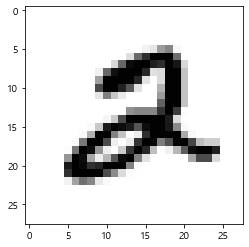

In [14]:
# 샘플 데이터를 matplotlib 이용해서 확인
import matplotlib.pyplot as plt
%matplotlib inline

digit = train_images[5]


print(train_labels[5])
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [15]:
train_images[5].shape

(28, 28)

In [16]:
## 축소해서 확인하면 숫자 2확인 가능
train_images[5].reshape(1,28,28)

array([[[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,  13,  25, 100, 122,   7,   0,   0,   0,   0,
           0,   0,   0

In [17]:
train_images[5].reshape(1,28,28).astype('float32')/255

array([[[0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.

### 이미지 데이터 전처리
- 모델에 사용할 데이터는 2차원 데이터를 원칙으로 함
    - float32 타입의 데이터를 선호
- (60000, 28, 28)의 3차원 데이터를 (60000, 28*28)의 2차원 데이터로 변경 => (600000, 784)

In [18]:
# 데이터 차원 변환
# train 데이터
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype('float32')/255

In [19]:
# (10000, 28 * 28) 크기의 2차원 배열로 변경 (10000, 784)
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [20]:
train_images.ndim
test_images.ndim

2

2

#### 레이블이 다중 분류인 경우 범주형으로 인코딩해서 레이블을 사용해야 함

In [21]:
# 레이블을 범주형으로 인코딩
from tensorflow.keras.utils import to_categorical

In [22]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [23]:
train_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import tensorflow as tf

tf.random.set_seed(3)


In [25]:
# (1) 모델 설정
# 딥러닝의 구조와 층을 설정하는 단계
network = Sequential()
network.add(Dense(512, activation='relu', input_shape=(28*28,))) # (28*28,) : 모델 충돌을 막기위해서
network.add(Dense(10, activation='softmax'))


In [26]:
# (2) 컴파일
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy']) # 데이터 레이블이 10개 데이터로 구성됨
                                      # 각 레이블 데이터의 확률이 반환

In [27]:
# (3) 모델 학습 (실행)
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 2s 3ms/step - loss: 0.2582 - accuracy: 0.9256
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.1027 - accuracy: 0.9693
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0675 - accuracy: 0.9793
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0491 - accuracy: 0.9852
Epoch 5/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0369 - accuracy: 0.9894


In [28]:
# (4) 모델평가(결과출력)
test_loss, test_acc =network.evaluate(test_images, test_labels)
print('test_acc:', test_acc)
print('test_loss:', test_loss)


313/313 [==============================] - 0s 726us/step - loss: 0.0738 - accuracy: 0.9786
test_acc: 0.978600025177002
test_loss: 0.0737864226102829
